In [194]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# Linearisation of R-P equation
$$
\omega^2  - j\omega \frac{4\mu_L}{\rho_L R_0^2} +  \frac{1}{\rho_L R_0^2} \left(
  ( \frac{2\sigma}{R_0} - {3kp_{G,0}}) \right)
  =
  - \frac{p_\infty}{\rho_L R_0^2 \epsilon_0} e^{-j\phi}
$$


$$
R(t) = R_0  -  R_0 \epsilon_0
    ~Re
      \left\{ e^{j ( \omega t + \phi)} \right\}
$$

$$
\phi = - arctan {
            \bigg( \frac{ \omega^2 - \omega_0^2}{ ( \omega \frac{4\mu_L}{\rho_L R_0^2}  )} \bigg)
                 } - \frac{\pi}{2}
$$

$$
\epsilon_0 = \frac{p_A}{\rho_L R_0^2}
  \frac{1}{\sqrt{\left(  (\omega^2 - \omega_0^2)^2 + (\omega \frac{4\mu_L}{\rho_L R_0^2} )^2        \right)}}
$$

## Non Dimensional numbers

(1) Acoustic pressure to ambient pressure ratio
$$
    p^* = \frac{p_A}{p_{\infty,0}}
$$
(2) Weber Number
$$
    w^* = \frac{p_{\infty,0} R_0}{2\sigma}
$$
(3) square of sound walength to radius ratio
$$
 l^{*} = \frac{1}{\gamma} \left( \frac{\lambda_L}{R_0} \right)^2 = \frac{p_{\infty,0}}{\rho_L R_0^2 \omega^2}
$$
(4) Ratio of natural frequency to driving frequency ratio
$$
    \omega^* = \frac{\omega_0}{\omega} = \sqrt{l^* \left( 3k (1+\frac{1}{w^*})  - \frac{1}{w^*}\right) }
$$
(5) Viscous Damping coefficient
$$
    \zeta^* = \frac{\beta_{\mu}}{\omega_0} = \frac{2\mu_L}{\rho_L R_0^2 \omega_0}
$$
## Bubble response
which gives for an external pressure field with an acoustic pressure pertubration
$$
    p_{\infty}(t) = p_{\infty,0} \left( 1 + p^* Re \{ e^{j\omega t}\} \right)
$$
The bubble responds as
$$
R(t) = R_0  -  R_0 \epsilon_0
    ~Re
      \left\{ e^{j ( \omega t + \phi)} \right\}
$$
where 
$$
\phi = - arctan {
            \bigg( \frac{ 1 - {\omega^*}^2 }{ ( 2\zeta^* \omega^* )} \bigg)
                 } - \frac{\pi}{2}
$$
and 
$$
\epsilon_0 = 
  \frac{p^* l^*}{\sqrt{\left(  {(1 - {\omega^*}^2)}^2 + { ( 2\zeta^* \omega^* )}^2        \right)}}
$$


In [206]:
#Liquid properties
rho = 1e3
#mu = 8.9e-4
mu = 8.9e-8
sigma=0.072

#Ambient COnditions
p_atm = 1e5

#Polytropic coeff
gamma=1.33

Fixed these parameters fixed for air-water at ambient

$$p_{\infty,0} = 1\times 10^5 Pa$$,

$$\rho_L = 1\times 10^{3} kgm^{-3}$$,

$$\mu_L=8.9\times 10^{-4} Ns/m^{2}$$,

$$\sigma = 0.072 N/m$$,

$$\gamma = 1.33$$

These parameters are chosen

$$R_0 = 2\times 10^{-6} m $$

$$\frac{\omega_0}{\omega} = 1.2 $$

In [247]:
#initial Condition
R_0 = 2e-6
u_0 = 0

#frequency ratio
omegastar = 1.2

#Polytropic coeff
k=gamma

#acoustic pressure ratio
pstar = 0.01

In [248]:
#NOn dimensional numbers
def parameters(omegastar, R_0, k, pstar):
    #weber number
    wstar = p_atm/(2*sigma/R_0)
    #Natural Frequency
    omega0 = np.sqrt(p_atm/(rho*R_0**2))*np.sqrt( 3*k*(1+1/wstar) - 1/wstar );
    omega = omega0/omegastar
    lstar = p_atm/(rho* R_0**2 * omega**2);
    zetastar = 2*mu/(rho* R_0**2 * omega);
    return [pstar, wstar, lstar, omegastar, zetastar, omega0]    

In [249]:
#Amplitude and phase
def cosineparameters(pstar, wstar, lstar, ostar, zetastar):
    phi = -np.arctan2(1-omegastar**2, 2*zetastar*omegastar)-0.5*np.pi
    eps = p*l/np.sqrt( ( 1-omegastar**2 )**2 +  ( 2*zetastar*omegastar )**2);
    return [phi, eps]

In [250]:
def cosine(A, PHI, OMEGA, T):
    return A*np.cos(OMEGA*T+PHI)

In [251]:
#check the non-dim numbers
(pstar, wstar, lstar, omegastar, zetastar, omega0) = parameters (omegastar, R_0, gamma, pstar) 
parameters (omegastar, R_0, gamma, pstar) 

[0.01,
 1.3888888888888888,
 0.23442078530963067,
 1.2,
 4.309114805197913e-06,
 12392336.341465238]

In [252]:
(phi, eps) = cosineparameters(pstar, wstar, lstar, omegastar, zetastar)
cosineparameters(pstar, wstar, lstar, omegastar, zetastar)

[-2.3504262569362666e-05, 0.08202323989514287]

## Bubble response using Linear Response analysis

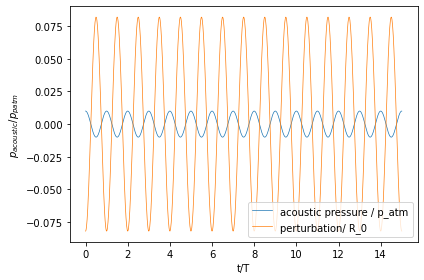

In [253]:
#plot p_infty(t) vs t
tsample = np.arange(0, 30*np.pi*omegastar/omega0, 30*np.pi*omegastar/(omega0*1000))
psample = cosine(pstar, 0., omega0/omegastar, tsample)
perturbation = -cosine(eps, phi, omega0/omegastar, tsample)
fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("$p_{acoustic}$/$p_{patm}$")
ax1.plot(tsample/(2*np.pi*omegastar/omega0), psample, linewidth = 0.7, label = "acoustic pressure / p_atm")
ax1.plot(tsample/(2*np.pi*omegastar/omega0), perturbation, linewidth = 0.7, label = "perturbation/ R_0")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

# Rayleigh-Plesset Equation
$$
    \frac{1}{\rho_L} {(p_B(t) - p_{\infty}(t))} =  R\frac{d^2 R}{dt^2}
             + \frac{3}{2} (\frac{dR}{dt})^2 + \frac{4 \nu_L}{R} \frac{dR}{dt} + \frac{2\sigma}{\rho_L R}
$$
## (Some more) Non dimensional numbers
(6) Non-dim time
    $$
        t^* = {t}{\omega}
    $$
(7) Non-dim Radius
    $$
       R^*(t^*) =  \frac{R(t^*)}{R_0}
    $$
(8) Non-dim Interface velocity
    $$
       U^{*} =  \frac{dR^*}{dt} = \frac{1}{R_0 \omega} \frac{dR}{dt}
    $$
 We alse have
    $$
       \frac{U^{*}}{dt^*} =  \frac{1}{R_0 \omega^2} \frac{d^2 R}{dt^2}
    $$
    
## R-P (Non-dimensionalised)

$$
    R^*\frac{dU^*}{dt^*} + \frac{3}{2} {U^*}^2 + 2\zeta^* \omega^* \frac{U^*}{R^*} + \frac{l^*}{w^*} \frac{1}{R^*} =
    l^* (1+\frac{1}{w^*}) (\frac{1}{R^*})^{3k} - l^* (1+p^* Re\{ e^{j t^*}\} )
$$
which gives

$$
\frac{d}{dt^*} 
\begin{bmatrix} R^* \\ U^* \end{bmatrix} =
\begin{bmatrix} U^* \\ \frac{1}{R^* }\left( 
    l^* (1+\frac{1}{w^*}) \left( \frac{1}{R^*}\right)^{3k} -l^* \left( 1 + p^* cos(t^*) \right) - 
    \frac{3}{2} {U^*}^2 - 2\zeta^* \omega^* \frac{U^*}{R^*} - \frac{l^*}{w^*} \frac{1}{R^*}
\right)
\end{bmatrix}
$$

In the above equation
$$ \frac{1}{\rho_L R_0^2 \omega^2} p_G(t) = l^* (1+\frac{1}{w^*}) \left( \frac{1}{R^*}\right)^{3k}$$
$$ \frac{1}{\rho_L R_0^2 \omega^2} p_\infty (t) = l^* \left( 1 + p^*  cos(t^*)  \right)$$


In [230]:
def p_infty (tstar):
    return lstar * (1 + pstar*np.cos(tstar))

#def dpinfty_dt(t):
#    return (-p_a*(omega*np.cos(omega*t) + (3*(t-t0)/t0**2)*np.sin(omega*t))*np.exp(-1.5*(t-t0)**2/(t0**2)));

#partial pressure of air as a function of R
def p_gas(Rstar, k):
    return lstar*(1+1/wstar)*np.power(Rstar, -3*k)

#d/dt (x) = equation(x,t)
def RP(x, tstar):
    (Rstar,Ustar) = x;
    dfdt = ( p_gas(Rstar, k) - p_infty(tstar) - 1.5*Ustar**2 
                     - 2*zetastar*omegastar*Ustar/Rstar-lstar/(wstar*Rstar) )/Rstar
    return (Ustar, dfdt)

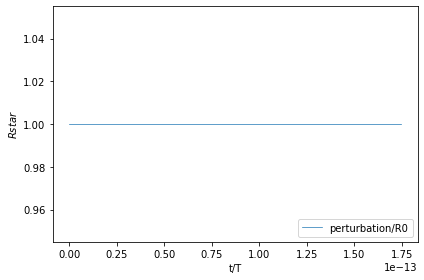

In [231]:
tstarsample = omega*tsample
R_RP = odeint(RP, [1, 0], tstarsample)
Ustarsample = R_RP[:,1]
Rstarsample = R_RP[:,0]

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("$Rstar$")
ax1.plot(tstarsample/(2*np.pi), Rstarsample, linewidth = 0.7, label = "perturbation/R0")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


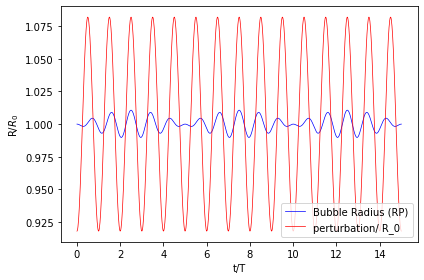

In [232]:
def p_infty (t):
    p_it = p_atm * ( 1 +  pstar * np.cos(omega0*t/omegastar) )
    return p_it

#partial pressure of air as a function of R
def p_gas(R):
    p_g = p_atm*(1+1/wstar)*np.power(R_0/R, 3*k);
    return p_g

#d/dt (x) = equation(x,t)
def RP(x, t):
    (R,u) = x;
    udot = (p_gas(R) - p_infty(t)-2*sigma/R-4*mu*u/R)/(R*rho)-3*u**2/(2*R)
    return (u, udot)

R_RP = odeint(RP, [R_0, u_0], tsample)
U_RP = R_RP[:,1]
R_RP = R_RP[:,0]/R_0

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("R/$R_0$")
ax1.plot(tsample/(2*np.pi*omegastar/omega0), R_RP, linewidth = 0.7, label = "Bubble Radius (RP)", color = 'blue')
#ax1.plot(tsample/(2*np.pi*omegastar/omega0), psample+1, linewidth = 0.7, label = "acoustic pressure / p_atm")
ax1.plot(tsample/(2*np.pi*omegastar/omega0), 1+perturbation, linewidth = 0.7, label = "perturbation/ R_0", color= 'red')


ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

#partial pressure of air at eqb
p_g0 = p_atm + 2 * sigma/R_0 - p_v

In [ ]:
#pressure at infty as a function of time
#6 cycles of sine waves with a gaussian envelope
p_a = 1.2*p_atm
omega_N = (1/R_0)*np.sqrt(3*gamma*p_g0/rho-2*sigma/R_0/rho);
omega = 2*omega_N;
t0 = 3*2*np.pi/omega
def p_infty (t):
    p_it = p_atm - p_a * np.sin(omega*t)*np.exp(-1.5*(t-t0)**2/(t0**2))
    return p_it

def dpinfty_dt(t):
    return (-p_a*(omega*np.cos(omega*t) + (3*(t-t0)/t0**2)*np.sin(omega*t))*np.exp(-1.5*(t-t0)**2/(t0**2)));

#partial pressure of air as a function of R
def p_gas(R):
    p_g = p_g0*np.power(R_0/R, 3*gamma);
    return p_g



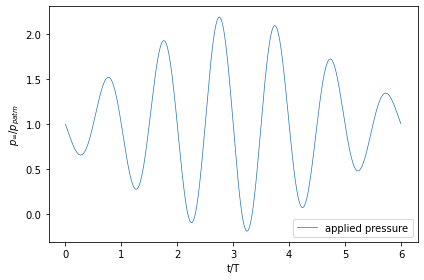

In [6]:
#plot p_infty(t) vs t
tsample = np.arange(0, 2*t0, t0/1000)
psample = p_infty(tsample)
fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("$p_\infty$/$p_{patm}$")
ax1.plot(tsample/(2*np.pi/omega), psample/p_atm, linewidth = 0.7, label = "applied pressure")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [7]:
#d/dt (x) = equation(x,t)
def RP(x, t):
    (R,u) = x;
    udot = (p_gas(R)+p_v-p_infty(t)-2*sigma/R-4*mu*u/R)/(R*rho)-3*u**2/(2*R)
    return (u, udot)

In [8]:
#speed of sound at ambient
C0 = 1450;

#Keller - Miksis
def KM(x, t):
    (R,u) = x; 
    p_L = p_gas(R) + p_v -2*sigma/R-4*mu*u/R; #p_l(r,t) at r=R
    dpL_dt_res = -3*gamma*p_gas(R)*u/R  +  2*sigma*u/R  +  4*mu*u**2/R**2; #dpl_dt_res = dpL_dt - (-4*mu*udot/R)
    udot = ( (1+u/C0)*(p_L-p_infty(t))/rho + R*(dpL_dt_res - dpinfty_dt(t))/(rho*C0) - 1.5*(1-u/3/C0)*u**2 )/ (1-u/C0 + 4*mu/(C0*rho*R))/R;
    return (u, udot)

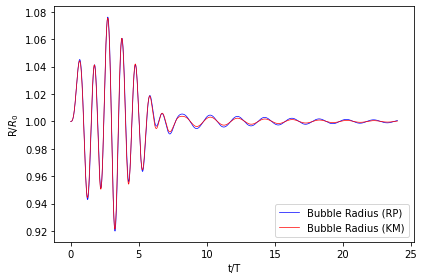

In [9]:
time = np.arange(0, 24*2*np.pi/omega, 0.000000000025)
#time = np.arange(0, 6*2*np.pi/omega, 0.00000000025)
#solving ODE by RP
R_RP = odeint(RP, [R_0, u_0], time)
U_RP = R_RP[:,1]
R_RP = R_RP[:,0]/R_0
#solving ODE by KM
R_KM = odeint(KM, [R_0, u_0], time)
U_KM = R_KM[:,1]
R_KM = R_KM[:,0]/R_0
#plot results

fig, ax1 = plt.subplots()

ax1.set_xlabel("t/T")
ax1.set_ylabel("R/$R_0$")
ax1.plot(time/(2*np.pi/omega), R_RP, linewidth = 0.7, label = "Bubble Radius (RP)", color = 'blue')
ax1.plot(time/(2*np.pi/omega), R_KM, linewidth = 0.7, label = "Bubble Radius (KM)", color = 'red')

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [10]:
#Fourier Analysis
from numpy.fft import fft, ifft, fftshift, fftfreq

def fft_transform(x, y):
    """
    Plot y(x) and its transform.
    
    y can be real or complex.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    fy = fftshift(fft(y))
    freqs = fftshift(fftfreq(len(x), d=(x[1] - x[0])))    

    return fy, freqs 

def show_transform(x, y):
    """
    Plot y(x) and its transform.
    
    y can be real or complex.
    """
    x = np.asarray(x)
    y = np.asarray(y)
    fy = fftshift(fft(y))
    freqs = fftshift(fftfreq(len(x), d=(x[1] - x[0])))    
    fig, axs = plt.subplots(nrows=2, constrained_layout=True)

    for ax in axs:
        ax.margins(x=0.05, y=0.1)
        ax.grid(True)
        ax.locator_params(symmetric=True)
        # (Line above doesn't seem to be working as expected...)
            
    ax = axs[0]
    if y.dtype.kind == 'c':
        ax.plot(x, y.real, 'r+', x, y.imag, 'bx')
    else:
        ax.plot(x, y, 'k.')
    ax.set_xlabel("Time")
    
    ax = axs[1]
    ax.plot(freqs, np.abs(fy), 'ko', mfc='none', label='amp')
    ax.plot(freqs, fy.real, 'r+', label='real')
    ax.plot(freqs, fy.imag, 'bx', label='imag')

    ax.set_xlabel("Frequency, cycles per unit time")
    ax.legend(loc="best", 
                  numpoints=1,
                  fontsize='small')
    

    return fig, axs 

In [11]:
#Forcing frequency 
omega

24596408.274380226

In [12]:
#natural frequency
omega_N

12298204.137190113

In [13]:
#resonance frequency
omega_P= np.sqrt(omega_N**2 - 8*mu**2/rho**2/R_0**4);
omega_P/omega_N

0.9986898494135765

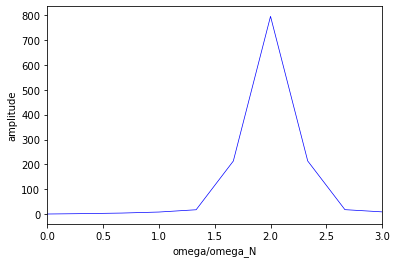

In [14]:
#pressure forcing
fy, freqs = fft_transform(tsample*omega_N, psample/p_atm-1)

fig, ax1 = plt.subplots()
ax1.set_xlabel("omega/omega_N")
ax1.set_ylabel("amplitude")
ax1.plot(freqs*2*np.pi, np.abs(fy), linewidth = 0.7, label = "energy spectrum of input acoustc wave", color = 'blue')
plt.xlim(0,3);
plt.show() #expect amplitude max at omega/omega_N=2

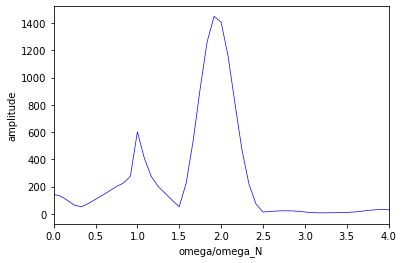

In [15]:
#fourier of radius
fy, freqs = fft_transform(time*omega_N, R_KM-1)

fig, ax1 = plt.subplots()
ax1.set_xlabel("omega/omega_N")
ax1.set_ylabel("amplitude")
ax1.plot(freqs*2*np.pi, np.abs(fy), linewidth = 0.7, label = "x(omega) from (R(t)/R0 -1 )", color = 'blue')
plt.xlim(0,4);
plt.show() #expect amplitude max ?

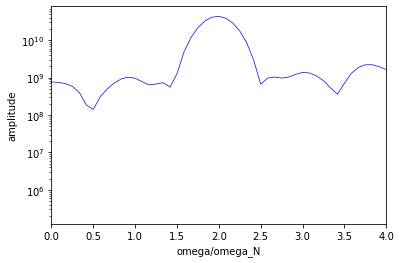

In [16]:
#energy spectrum of reflecting wave is rho*const*( 2*(Rdot**2)*R + (R**2)*Rdotdot )

Energy = [];
Energy.append(0.)
#udot = [];
r, = np.shape(R_KM)
for i in np.arange(1, r):
    t = time[i]
    u = U_KM[i]
    R = R_KM[i]
    u,a = KM((R,u), t)
    Energy.append(2*u**2*R+R**2*a)

#energy spectrum
fy, freqs = fft_transform(time*omega_N, Energy) 
fig, ax1 = plt.subplots()
ax1.set_xlabel("omega/omega_N")
ax1.set_ylabel("amplitude")
ax1.semilogy(freqs*2*np.pi, np.abs(fy), linewidth = 0.7, label = "x(omega) from (R(t)/R0 -1 )", color = 'blue')
plt.xlim(0,4);
plt.show() #expect amplitude max ?

In [193]:
np.arctan2(1,0)

TypeError: return arrays must be of ArrayType